#<seaborn 라이브러리를 활용한 고급시각화 (feat. 제공 데이터를 활용한 추가 분석)>

#<tips 데이터셋 _ 특정 레스토랑의 매출 데이터>
* 총 지불 금액(total bill)
* 팁 금액(tip)
* 고객의 성별(sex)
* 흡연 여부(smoker)
* 방문 요일(day)
* 방문 시간대(time)
* 일행의 수(size)



## 막대그래프

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
sns.set_theme(style="whitegrid", rc={"figure.figsize": (5,5)}) #그래프 사이즈(가로, 세로)
sns.set_palette("hls", 4) #his라는 이름의 팔레트에서 4개의 색 사용

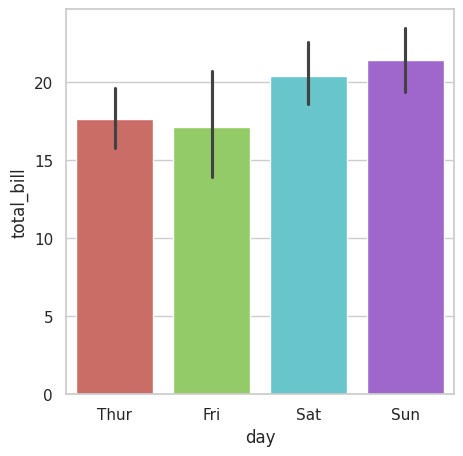

In [ ]:
#요일별 평균 지불 금액
sns.barplot(data=df,
            x="day",
            y="total_bill",
            estimator="mean", #y축 값들을 평균으로 집계
            hue="day", #그룹 지정
            legend=None #범례 표시 X
            )
plt.show()

<ipython-input-22-b4e9dad91723>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




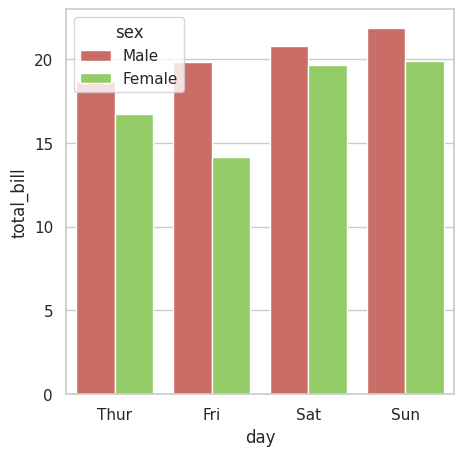

In [ ]:
#요일별 성별 평균 지불 금액
sns.barplot(data=df,
            x="day",
            y="total_bill",
            estimator="mean",
            hue="sex",
            ci=None
            )
plt.show()

In [ ]:
#누적막대그래프 구성을 위한 데이터셋 준비
  #pivot table로 데이터셋 재구성
df2 = df.pivot_table(index="day",  #행 위치의 칼럼
                     columns="sex",  #열 위치의 칼럼
                     values="total_bill",  #데이터 칼럼
                     aggfunc="mean"  #데이터 집계함수
                     )
df2

<ipython-input-23-8d1f227416ac>:3: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



sex,Male,Female
day,,
Thur,18.714667,16.715312
Fri,19.857000,14.145556
Sat,20.802542,19.680357
Sun,21.887241,19.872222


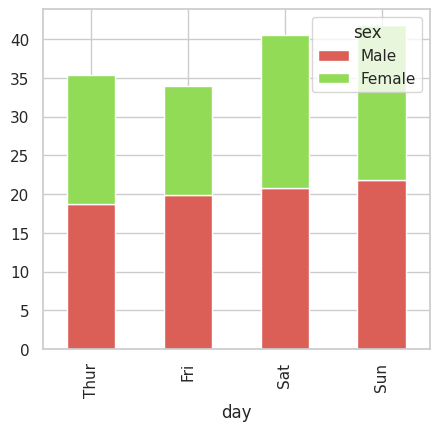

In [ ]:
#누적막대그래프
df2.plot.bar(stacked=True)
plt.subplots_adjust(bottom=0.2)
plt.show()

## tips 데이터셋을 막대그래프로 시각화해보며, 데이터셋의 여러 변수들이 tip에 어떤 영향을 미치는지 궁금해져 다중회귀분석을 진행하게 됨

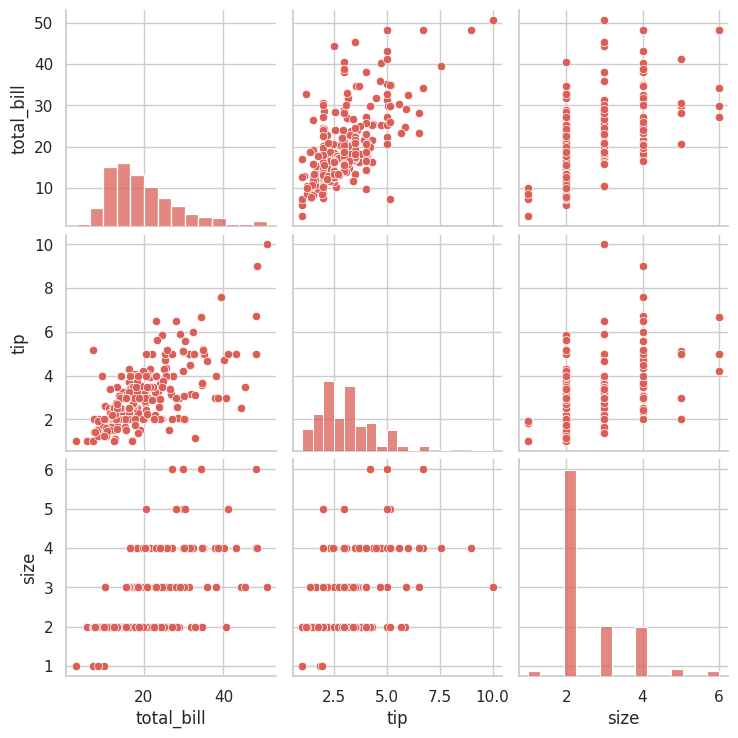

In [ ]:
#칼럼 간 상관관계 시각화
sns.pairplot(df)

In [ ]:
#현재 범주형 변수인 성별변수와 흡연여부변수를 더미변수로 변환
#(male은 0, female은 1 // 비흡연자는 0, 흡연자는 1)

def get_sex(x):
  if x == 'Male':
    return 0
  elif x == 'Female':
    return 1
df["sex_dv"] = df["sex"].apply(get_sex)

def get_smoker(x):
  if x == 'No':
    return 0
  elif x == 'Yes':
    return 1
df["smoker_dv"] = df["smoker"].apply(get_smoker)

df.head()

,total_bill,tip,sex,smoker,day,time,size,sex_dv,smoker_dv
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0


In [ ]:
#요일변수와 시간대변수 더미변수 갯수 설정을 위한 데이터값 확인

print(df["day"].unique())
print(df["time"].unique())

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']


In [ ]:
#현재 범주형 변수인 요일변수와 시간대변수를 더미변수로 변환

import pandas as pd
df = pd.get_dummies(df, columns=["day"], drop_first=True)
df = pd.get_dummies(df, columns=["time"], drop_first=True)
df[["day_Fri", "day_Sat", "day_Sun","time_Dinner"]] = df[["day_Fri", "day_Sat", "day_Sun", "time_Dinner"]].astype(int)

df.head()

,total_bill,tip,sex,smoker,size,sex_dv,smoker_dv,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,Female,No,2,1,0,0,0,1,1
1,10.34,1.66,Male,No,3,0,0,0,0,1,1
2,21.01,3.50,Male,No,3,0,0,0,0,1,1
3,23.68,3.31,Male,No,2,0,0,0,0,1,1
4,24.59,3.61,Female,No,4,1,0,0,0,1,1


In [ ]:
X = df[["total_bill", "sex_dv", "smoker_dv", "size", "day_Fri",
        "day_Sat", "day_Sun", "time_Dinner"]]
y = df["tip"]

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# 절편과 회귀계수 출력
print("절편 (Intercept):", model.intercept_)
print("회귀 계수 (Coefficients):", model.coef_)

# 결정계수 (R²) 출력
print("결정계수 (R²):", model.score(X, y))

#회귀식: tip=0.6772+0.0945×total_bill+0.0324×sex_dv−0.0864×smoker_dv+0.176×size+0.1623×day_Fri+0.0408×day_Sat+0.1368×day_Sun−0.0681×time_Dinner
#결정계수가 0.47007812322060794로, 회귀모델의 설명력이 다소 만족스럽지는 않은 값

절편 (Intercept): 0.6772457461145098
회귀 계수 (Coefficients): [ 0.09448701  0.03244094 -0.08640832  0.175992    0.1622592   0.04080082
  0.13677854 -0.0681286 ]
결정계수 (R²): 0.47007812322060794


In [ ]:
#MSE

from sklearn.metrics import mean_squared_error

y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print("평균 제곱 오차 (MSE):", mse)

#평균 제곱 오차 (MSE): 1.0103535612257852

평균 제곱 오차 (MSE): 1.0103535612257852


In [ ]:
#MSE가 허용 가능한 오차인지 판단하기 위한 tip값의 범위 확인

min_tip = df['tip'].min()
max_tip = df['tip'].max()

print(f"tip 값의 범위: {min_tip} ~ {max_tip}")

#tip의 범위가 1.0 ~ 10.0이므로, MSE 약 1.01은 전체 tip 값 범위의 약 10% 이내에서 예측이 오차를 보인다는 의미
#예측이 상대적으로 작은 오차를 가지는 것으로 해석 가능

tip 값의 범위: 1.0 ~ 10.0


# <flights 데이터셋>

월별, 연도별 항공기 탑승객 수

## 선그래프

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = sns.load_dataset("flights")
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
sns.set_theme(style="whitegrid", rc={"figure.figsize":(8, 5)})
sns.set_palette("hls", 12)

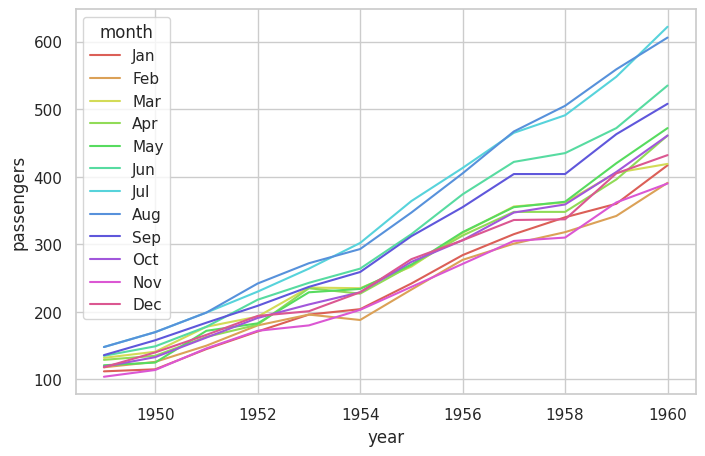

In [ ]:
sns.lineplot(data=df,
             x="year",
             y="passengers",
             hue="month"
             )
plt.show()

## 히트맵

In [ ]:
df_hm = df.pivot_table(index="month",
                       columns="year",
                       values="passengers",
                       aggfunc="mean"
                       )
df_hm.head()

<ipython-input-36-a72d0bc00f34>:1: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0


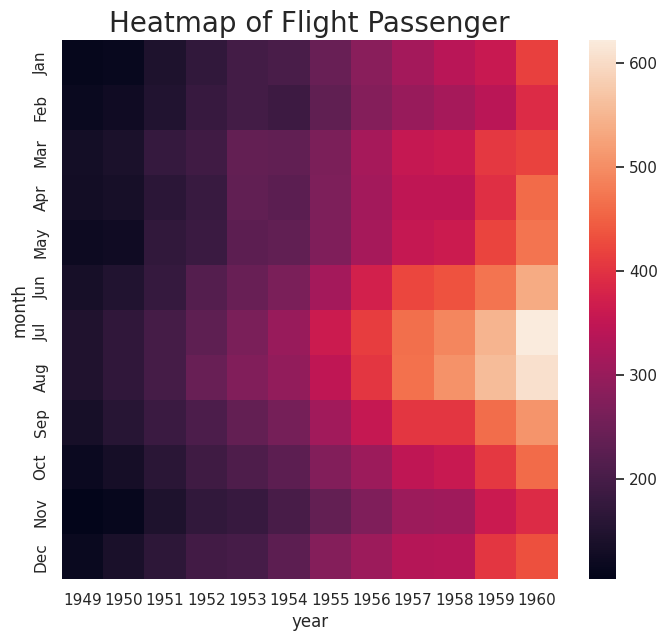

In [ ]:
#히트맵
sns.set_theme(rc={"figure.figsize":(8,7)})
sns.heatmap(df_hm).set_title("Heatmap of Flight Passenger", fontsize=20)
plt.show()

##flights 데이터셋이 시계열 분석에 적합한 자료라는 생각이 들어 시계열 분석을 진행함

In [4]:
#분석을 위해 시계열 자료로 정돈
import pandas as pd
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str), format='%Y-%b')
df.set_index('date', inplace=True)
df.head()

,year,month,passengers
date,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


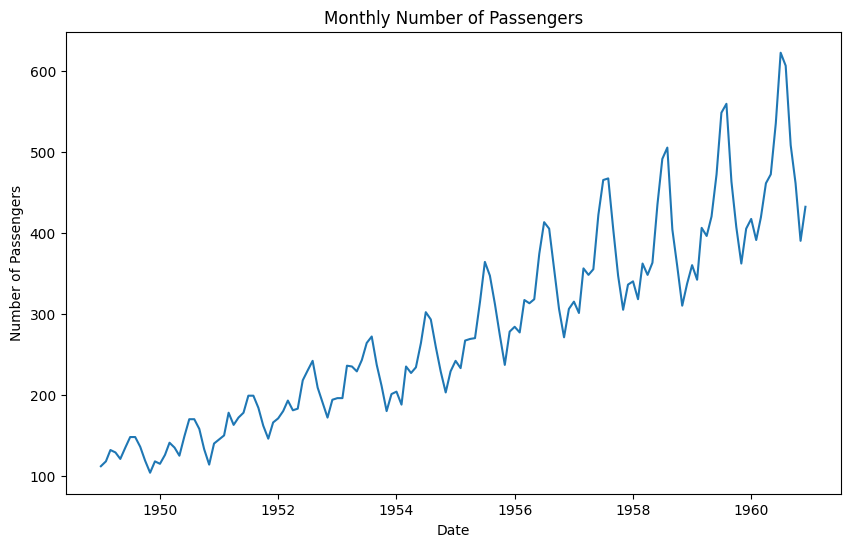

In [5]:
#시계열 데이터 시각화
plt.figure(figsize=(10, 6))
plt.plot(df['passengers'])
plt.title("Monthly Number of Passengers")
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

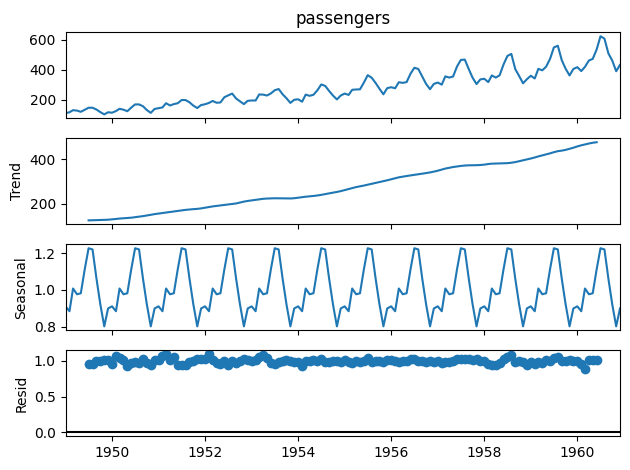

In [6]:
#계절성과 추세가 보이는 것 같음
# => 분해하여 시각화

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['passengers'], model='multiplicative', period=12)
fig = decomposition.plot()
plt.show()

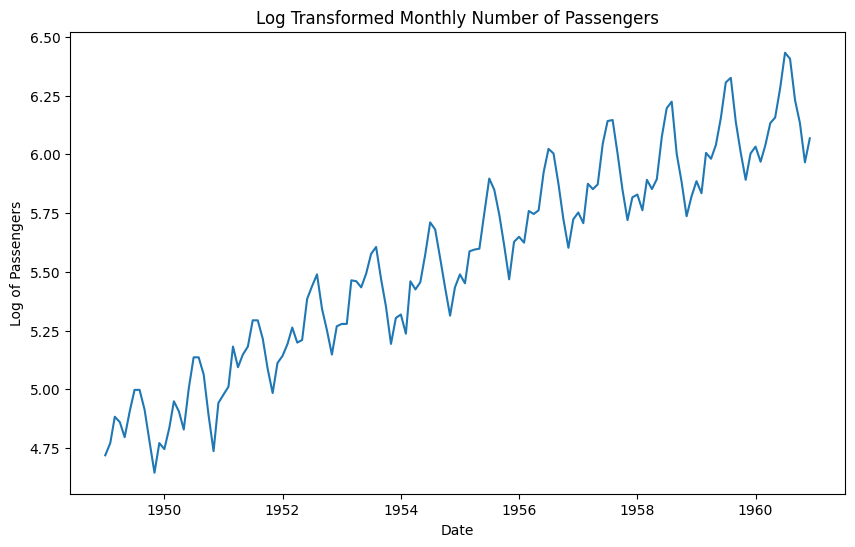

In [7]:
#점점 진폭이 커지는 것을 통해 분산이 일정하지 않음을 알 수 있음
# => 로그변환

import numpy as np
df['log_passengers'] = np.log(df['passengers'])

plt.figure(figsize=(10, 6))
plt.plot(df['log_passengers'])
plt.title("Log Transformed Monthly Number of Passengers")
plt.xlabel('Date')
plt.ylabel('Log of Passengers')
plt.show()

#분산이 보다 일정해짐

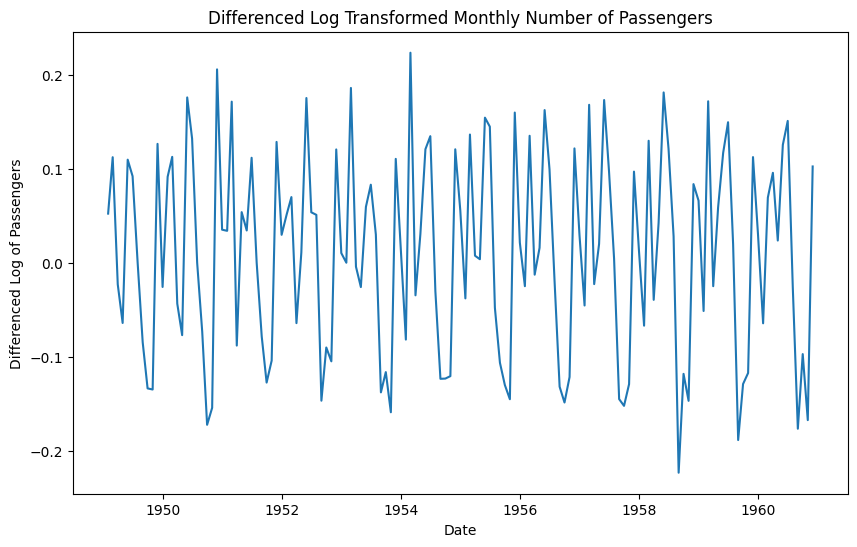

In [13]:
#우상향하는 추세가 있음
# => 차분

df['log_passengers_diff'] = df['log_passengers'].diff()

plt.figure(figsize=(10, 6))
plt.plot(df['log_passengers_diff'].dropna())  # 차분 후 결측치 제거
plt.title("Differenced Log Transformed Monthly Number of Passengers")
plt.xlabel('Date')
plt.ylabel('Differenced Log of Passengers')
plt.show()

#추세가 사라짐

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['log_passengers_diff'].dropna(), model='multiplicative', period=12)
fig = decomposition.plot()
plt.show()

#오류 발생 _  multiplicative 모델은 시계열데이터에서 0 이하의 값을 처리하지 못하기 때문

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

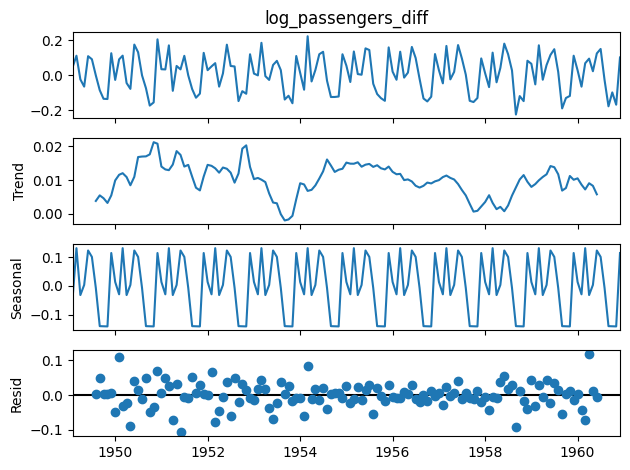

Trend:
 date
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
1949-06-01   NaN
Name: trend, dtype: float64
Seasonal:
 date
1949-02-01   -0.029150
1949-03-01    0.131974
1949-04-01   -0.031711
1949-05-01    0.003528
1949-06-01    0.123807
Name: seasonal, dtype: float64
Residual:
 date
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
1949-06-01   NaN
Name: resid, dtype: float64


In [11]:
#Additive model
# : 시계열 데이터에서 추세(trend), 계절성(seasonality), 그리고 **불규칙한 변동(irregularity)**을 분해하여 각각의 구성 요소를 독립적으로 분석하는 방법
#Y_t = T_t + S_t + I_t
#  Y_t ​: 시계열 데이터의 원본 값 (관측값)
#  T_t : 추세(trend)
#  S_t: 계절성(seasonality)
#  I_t: 불규칙한 변동(irregularity)

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['log_passengers_diff'].dropna(), model='additive', period=12)
fig = decomposition.plot()
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['log_passengers_diff'].dropna())  # 결측치 제거 후 검정 수행
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

if result[1] < 0.05:
    print("정상성을 만족함 (귀무가설 기각)")
else:
    print("정상성이 부족함 (추가 차분 필요)")

ADF Statistic: -2.717130598388114
p-value: 0.07112054815086184
Critical Values: {'1%': np.float64(-3.4825006939887997), '5%': np.float64(-2.884397984161377), '10%': np.float64(-2.578960197753906)}
정상성이 부족함 (추가 차분 필요)


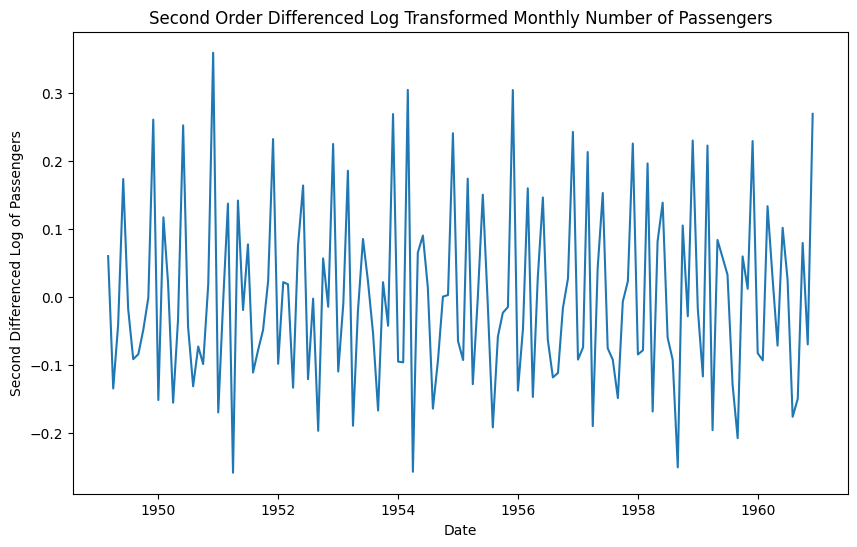

In [14]:
df['log_passengers_diff2'] = df['log_passengers_diff'].diff()

plt.figure(figsize=(10, 6))
plt.plot(df['log_passengers_diff2'].dropna())
plt.title("Second Order Differenced Log Transformed Monthly Number of Passengers")
plt.xlabel('Date')
plt.ylabel('Second Differenced Log of Passengers')
plt.show()

In [15]:
result = adfuller(df['log_passengers_diff2'].dropna())

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

if result[1] < 0.05:
    print("정상성을 만족함 (귀무가설 기각)")
else:
    print("정상성이 부족함 (추가 차분 필요)")

ADF Statistic: -8.19662913218224
p-value: 7.419304549376186e-13
Critical Values: {'1%': np.float64(-3.4825006939887997), '5%': np.float64(-2.884397984161377), '10%': np.float64(-2.578960197753906)}
정상성을 만족함 (귀무가설 기각)


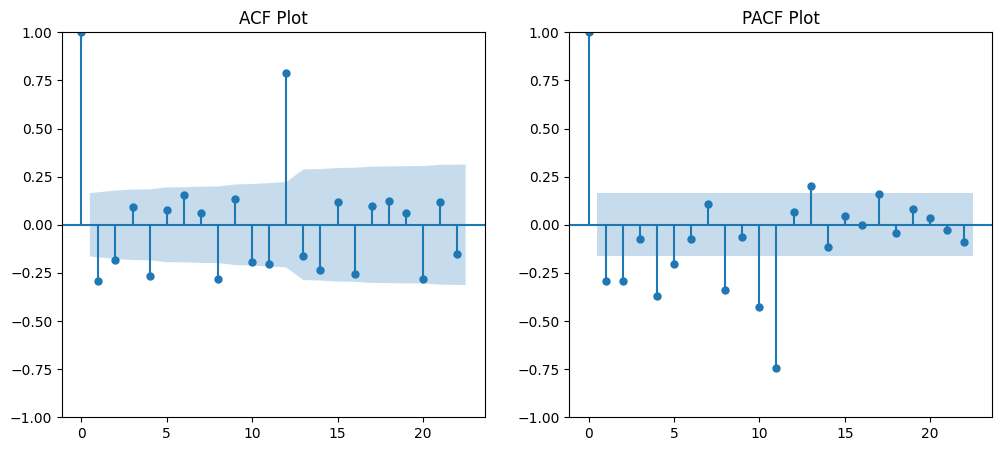

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_acf(df['log_passengers_diff2'].dropna(), ax=plt.gca())  # ACF
plt.title("ACF Plot")

plt.subplot(1, 2, 2)
plot_pacf(df['log_passengers_diff2'].dropna(), ax=plt.gca())  # PACF
plt.title("PACF Plot")

plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         log_passengers   No. Observations:                  144
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 117.095
Date:                Tue, 01 Apr 2025   AIC                           -228.191
Time:                        14:58:08   BIC                           -219.323
Sample:                    01-01-1949   HQIC                          -224.587
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2081      0.111      1.877      0.061      -0.009       0.425
ma.L1         -1.0000     37.530     -0.027      0.979     -74.558      72.558
sigma2         0.0109      0.409      0.027      0.9

<ipython-input-25-6fd7fa9af536>:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=df.index[-1], periods=13, freq='M')[1:], forecast, label="Forecast", linestyle="dashed")


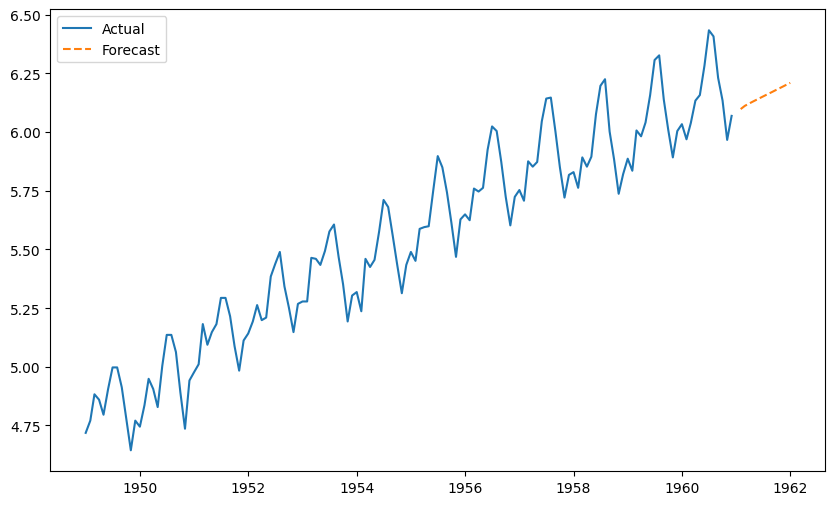

In [25]:
from statsmodels.tsa.arima.model import ARIMA

p, d, q = 1, 2, 1

# ARIMA 모델 적합
model = ARIMA(df['log_passengers'], order=(p, d, q))
model_fit = model.fit()

# 요약 결과 출력
print(model_fit.summary())

# 미래 데이터 예측
forecast = model_fit.forecast(steps=12)  # 12개월 예측
plt.figure(figsize=(10, 6))
plt.plot(df['log_passengers'], label="Actual")
plt.plot(pd.date_range(start=df.index[-1], periods=13, freq='M')[1:], forecast, label="Forecast", linestyle="dashed")
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

                               SARIMAX Results                                
Dep. Variable:         log_passengers   No. Observations:                  144
Model:                ARIMA(1, 2, 12)   Log Likelihood                 159.742
Date:                Tue, 01 Apr 2025   AIC                           -291.484
Time:                        14:58:14   BIC                           -250.102
Sample:                    01-01-1949   HQIC                          -274.668
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2034      0.187     -1.086      0.278      -0.570       0.164
ma.L1         -0.4686      0.302     -1.551      0.121      -1.061       0.124
ma.L2         -0.0961      0.175     -0.549      0.5

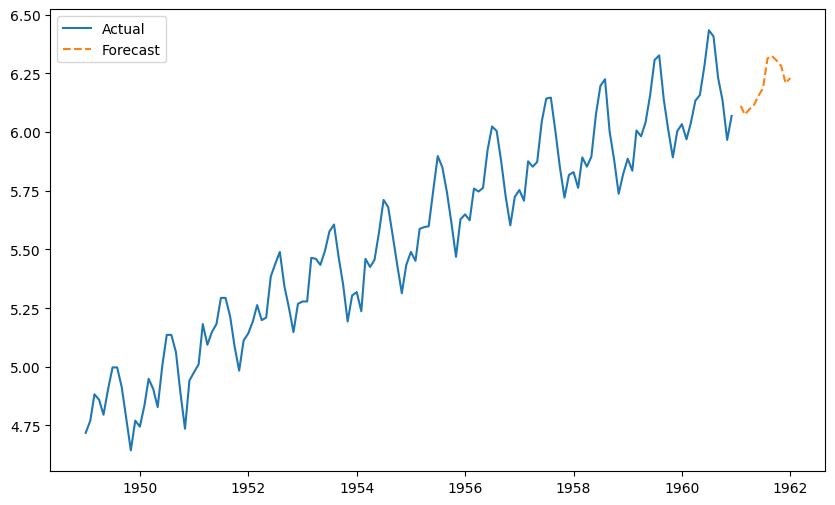

In [26]:
from statsmodels.tsa.arima.model import ARIMA

p, d, q = 1, 2, 12

# ARIMA 모델 적합
model = ARIMA(df['log_passengers'], order=(p, d, q))
model_fit = model.fit()

# 요약 결과 출력
print(model_fit.summary())

# 미래 데이터 예측
forecast = model_fit.forecast(steps=12)  # 12개월 예측
plt.figure(figsize=(10, 6))
plt.plot(df['log_passengers'], label="Actual")
plt.plot(pd.date_range(start=df.index[-1], periods=13, freq='M')[1:], forecast, label="Forecast", linestyle="dashed")
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

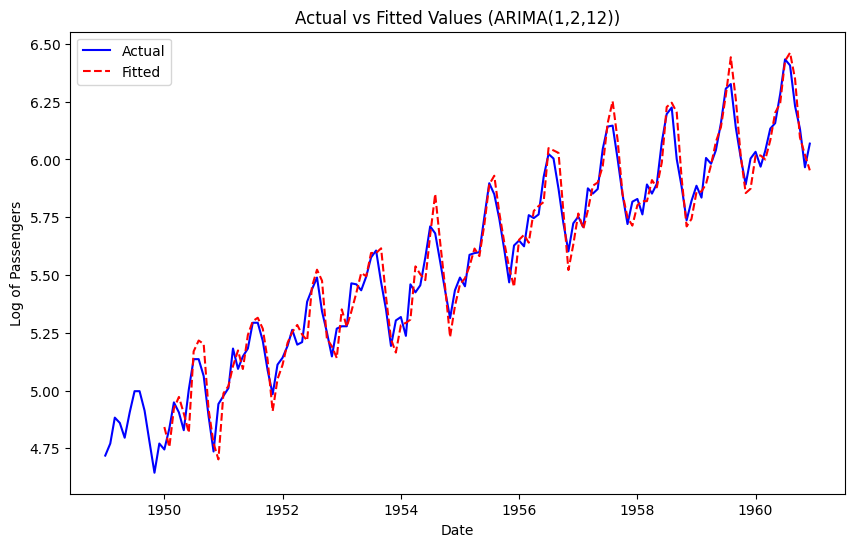

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 최적 모델 (p,d,q) = (1,2,12) 사용
p, d, q = 1, 2, 12
model = ARIMA(df['log_passengers'], order=(p, d, q))
model_fit = model.fit()


df['fitted_values'] = model_fit.fittedvalues
df['fitted_values'].iloc[:12] = None  # 처음 12개월을 NaN 처리

plt.figure(figsize=(10, 6))
plt.plot(df['log_passengers'], label="Actual", color="blue")
plt.plot(df['fitted_values'], label="Fitted", color="red", linestyle="dashed")
plt.title("Actual vs Fitted Values (ARIMA(1,2,12))")
plt.xlabel("Date")
plt.ylabel("Log of Passengers")
plt.legend()
plt.show()

# <seoul_temp 데이터셋>

일별로 기록된 기온 데이터

## 상자그림

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/seoul_temp.csv')
df.head()

,날짜,평균기온,평균강수량,평균일조시간,평균습도,평균순간최대풍속
0,20231231,2.1,4.7,0.6,95.5,8.3
1,20231230,0.6,13.1,0.0,92.0,6.9
2,20231229,1.3,0.0,1.8,71.0,5.7
3,20231228,1.2,0.0,8.1,69.5,8.0
4,20231227,1.5,0.0,8.2,76.6,4.7


In [ ]:
df['month'] = (df.날짜 - 20230000) // 100  # 월 컬럼 생성
df.head()

,날짜,평균기온,평균강수량,평균일조시간,평균습도,평균순간최대풍속,month
0,20231231,2.1,4.7,0.6,95.5,8.3,12
1,20231230,0.6,13.1,0.0,92.0,6.9,12
2,20231229,1.3,0.0,1.8,71.0,5.7,12
3,20231228,1.2,0.0,8.1,69.5,8.0,12
4,20231227,1.5,0.0,8.2,76.6,4.7,12


In [ ]:
# 월별 평균 기온에 의한 순위 계산
tmp = df.groupby('month').mean()
rank = tmp['평균기온'].rank() - 1
rank = rank.astype(int).to_list()
rank

[0, 2, 4, 5, 7, 8, 10, 11, 9, 6, 3, 1]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

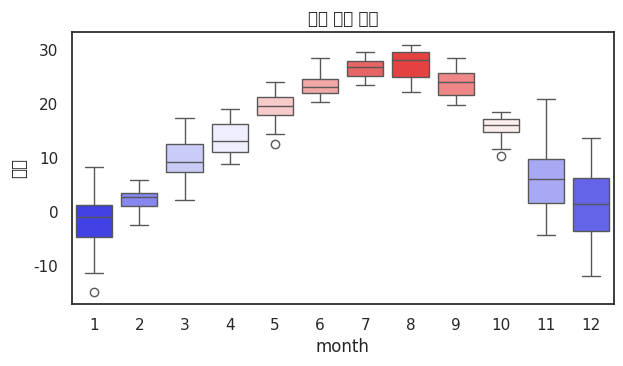

In [ ]:
sns.set_theme(style="white", rc={"figure.figsize": (7, 4)}) # 그래프 테마 설정

# 팔레트 색 선택 및 순서 변경
mycolor = sns.color_palette('bwr', 12)
mycolor = pd.Series(mycolor)[rank].to_list()

# 월별 기온 분포를 상자그림으로 작성
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

sns.boxplot(data=df,  # df 이름
            x='month',  # x축 컬럼
            y='평균기온',  # y축 컬럼
            hue='month',  # 그룹 지정
            legend=None,  # 범례 표시 안 함
            palette=mycolor  # 팔레트 지정
            ).set(title='월별 기온 분포')

plt.ylabel('기온')  # y축 레이블
plt.subplots_adjust(bottom=0.2)  # 하단 여백
plt.show()

# <crimeRatesByState2005 데이터셋>

미국의 주별 범죄 발생 건수

## 버블차트

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/crimeRatesByState2005.csv')
df.head()

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population
0,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4545049
1,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,669488
2,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,5974834
3,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2776221
4,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,35795255


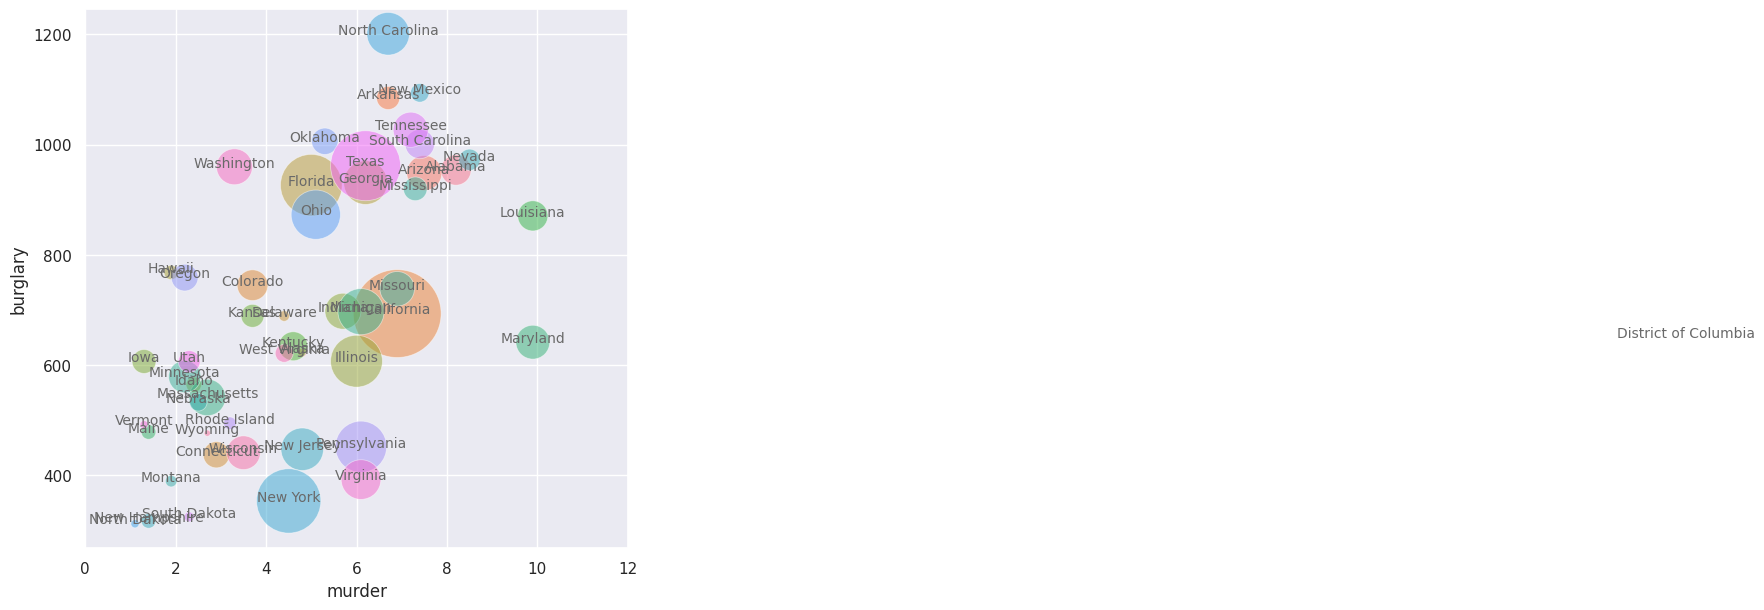

In [ ]:
# 버블 차트
sns.set_theme(rc={'figure.figsize': (7, 7)})

sns.scatterplot(
    data=df,
    x="murder",  # x축; 살인
    y="burglary",  # y축; 절도
    size="population",  # 원의 크기
    sizes=(20, 4000),  # 원의 크기 범위
    hue="state",  # 원의 색
    alpha=0.5,  # 투명도
    legend=False  # 범례 표시 여부
)
plt.xlim(0, 12)  # x축 값의 범위

# 주 이름을 버블 위에 표시
for i in range(0, df.shape[0]):
    plt.text(x=df.murder[i], y=df.burglary[i], s=df.state[i],
         horizontalalignment='center', size='small', color='dimgray')
plt.show()

# <데이터셋>

타이타닉호 탑승객 생존 여부

* 성별에 따른 생존 여부

## 모자이크plot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [ ]:
# 데이터 준비
df = sns.load_dataset('titanic')
df.head()
dict1 = {0: '사망', 1: '생존'}
dict2 = {'male': '남성', 'female': '여성'}
df = df.replace({'survived': dict1})
df = df.replace({'sex': dict2})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,사망,3,남성,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,생존,1,여성,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,생존,3,여성,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,생존,1,여성,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,사망,3,남성,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47581 (\N{HANGUL SYLLABLE MANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

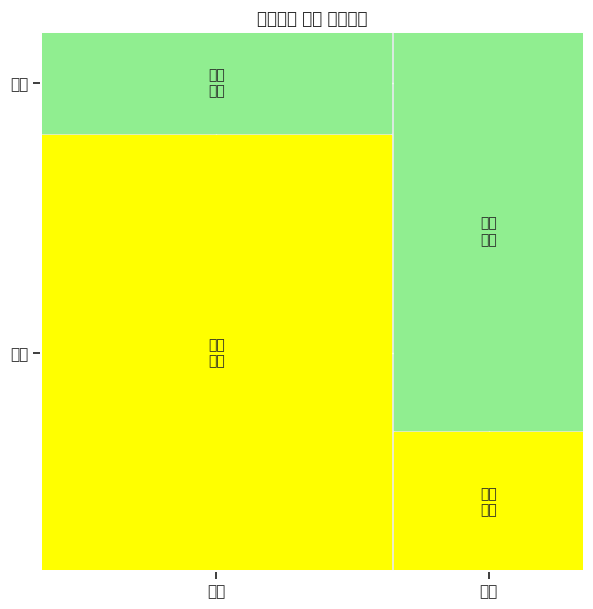

In [ ]:
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# 그래프 설정
def props(key):
       return {'color': 'lightgreen' if '생존' in key else 'yellow'}

# 그래프 작성
mosaic(data=df.sort_values('sex'),
       index=['sex', 'survived'],
       properties=props,  # 타일 색상 변경
       axes_label=True,  # 축 레이블 표시
       title='타이타닉 남녀 생존비율'  # 그래프 제목
       )

plt.show()

① 남녀 승객의 비율
모자이크 플롯을 세로로 분할하면 왼쪽이 남성 승객, 오른쪽이 여성 승객이다, 타일의 면적은 승객의 비율을 나타낸다. 이를 통해 타이타닉호에는 남성 승객이 여성 승객보다 두 배 이상 많이 탑승했음을 알 수 있다.

② 전체 생존자와 사망자의 비율
모자이크 플롯을 가로로 분할하면 초록색 영역은 생존자, 노란색 영역은 사망자를 나타낸다. 이 결과를 통해 사망자 수가 생존자 수보다 훨씬 많다는 것을 확인할 수 있다.

③성별에 따른 생존율
성별에 따라 생존자 비율을 살펴보자. 남성 승객의 경우 대부분 사망한 반면, 여성 승객은 대다수가 생존했다（생존한 남성은 대부분 아동임）. 이는 여성의 생존율이 남성보다 월등히 높다는 것을 보여준다. 이러한 결과는 성인 남성들이 아이들과 여성들에게 구명보트를 양보했기 때문으로 해석할 수 있다.

* 객실에 따른 생존여부

## 막대그래프

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [ ]:
plt.rcParams['font.family'] ='Malgun Gothic' # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

In [ ]:
df = sns.load_dataset('titanic')

dict1 = {0:'사망', 1:'생존'}
dict2 = {1:'1등실', 2:'2등실', 3:'3등실'}

df = df.replace({'survived': dict1})
df = df.replace({'pclass': dict2})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,사망,3등실,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,생존,1등실,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,생존,3등실,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,생존,1등실,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,사망,3등실,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 47581 (\N{HANGUL SYLLABLE MANG}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from font(s) DejaVu Sans.



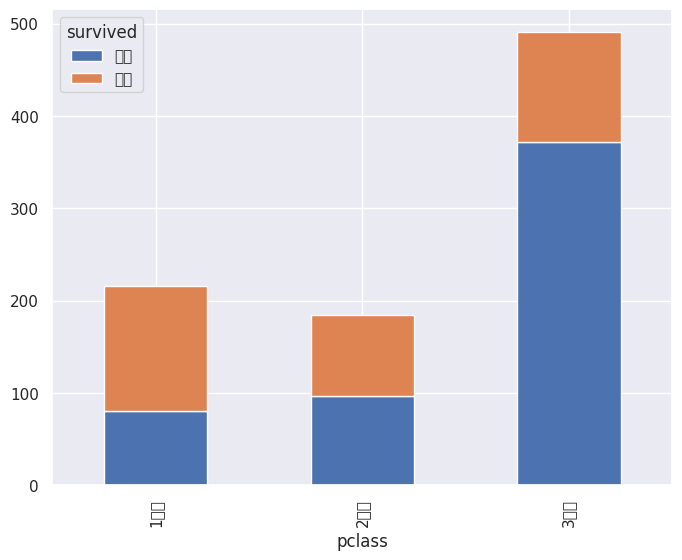

In [ ]:
df2 = df.pivot_table(index = 'pclass', # 행 위치에 들어갈 컬럼
                    columns = 'survived', # 열 위치에 들어갈 컬럼
                    values = 'class', # 데이터로 사용할 컬럼
                    aggfunc = 'count' # 데이터 집계함수
                    )

df2

df2.plot.bar(stacked=True)
plt.subplots_adjust(bottom=0.2)
plt.show()

## 모자이크plot

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 47581 (\N{HANGUL SYLLABLE MANG}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython

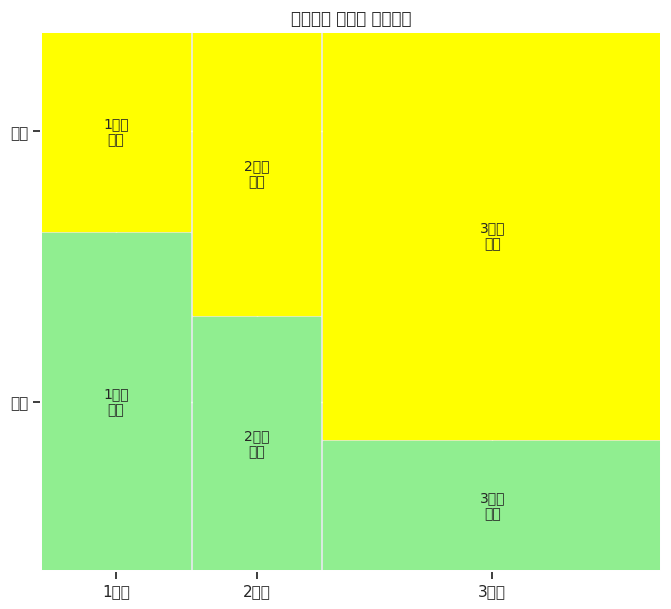

In [ ]:
props = lambda key: {'color': 'lightgreen' if '생존' in key else 'yellow'}

# 그래프 작성
mosaic(data = df.sort_values('pclass'),
index = ['pclass', 'survived'],
properties = props, # 타일 색상 변경
axes_label = True, # 축 레이블 표시
title='타이타닉 선실별 생존비율' # 그래프 제목
)

plt.show()

## 트리맵

In [ ]:
import plotly.express as px
import matplotlib.image as mpimg

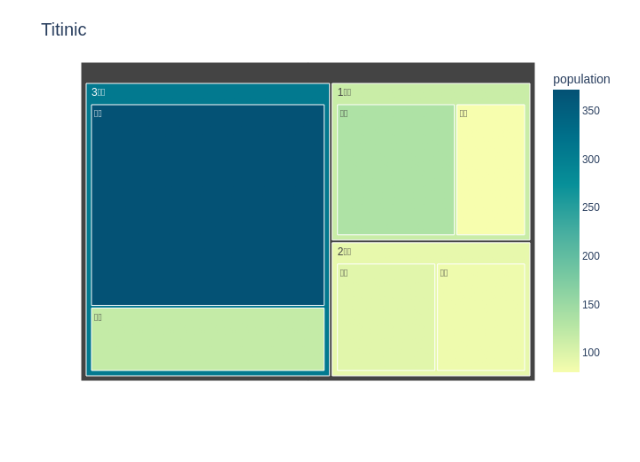

In [ ]:
df3 = df.groupby(['pclass', 'survived'])['sex'].count()
df3 = df3.reset_index()
df3.columns = ['pclass', 'survived', 'population']

fig = px.treemap(data_frame = df3,
path=['pclass', 'survived'], # 데이터의 계층 구조
values='population', # 타일 면적 기준 컬럼
color='population', # 색 온도 기준 컬럼
color_continuous_scale='Bluyl' # 컬러 팔레트
)

plt.axis('off') # 축 눈금 제거
fig.update_layout(title_text = 'Titinic', # 그래프 제목
title_font_size =20) # 제목 폰트 크기

# 그래프 저장 & 화면에 표시하기
fig.write_image('treemap.png')
plt.imshow(mpimg.imread('treemap.png'))
plt.show()

## 레이더차트

In [ ]:
!pip install plotly
!pip install -U kaleido
import os
os._exit(0)

In [ ]:
import matplotlib.image as mpimg
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def radar(df, fills, min_max, title=''):
    fig = go.Figure()
    categories = df.columns.to_list()
    categories.append(categories[0])
    i = 0
    while (i < len(df)):
        scores = df.iloc[i, :].to_list()
        scores.append(scores[0])
        fig.add_trace(go.Scatterpolar(
            r=scores,  # 축의 값
            theta=categories,  # 축의 레이블
            fill=fills[i],  # 다각형 채우기 색
            name=df.index[i]  # 다각형 레이블
        ))
        i += 1

        fig.update_layout(
            polar_radialaxis_visible=True,
            polar_radialaxis_range=min_max,  # 축의 값 범위
            showlegend=True,
            margin_t=50,  # 상단 여백
            margin_l=100,  # 좌측 여백
            margin_r=100,  # 우측 여백
            margin_b=25,  # 하단 여백
            width=700,  # 그래프의 폭(pixel)
            height=700,  # 그래프의 높이(pixel)
            title_text=title,  # 그래프 제목
            title_font_size=30,  # 제목 폰트 사이즈
            font_size=20  # 폰트 사이즈
            )

    # 그래프 저장 & display
    plt.axis('off')
    fig.write_image('rader.png')
    plt.imshow(mpimg.imread('rader.png'))
    plt.show()

In [ ]:
# 데이터 입력
df = pd.DataFrame({
    'Kor': [72, 70, 90, 60, 66],
    'Eng': [84, 85, 95, 70, 85],
    'Math': [71, 40, 88, 80, 75],
    'Sci': [83, 80, 91, 90, 70],
    'Phy': [60, 60, 60, 70, 50]
})
df.index = ['AVG', 'John', 'Tom', 'Smith', 'Grace']
df


,Kor,Eng,Math,Sci,Phy
AVG,72,84,71,83,60
John,70,85,40,80,60
Tom,90,95,88,91,60
Smith,60,70,80,90,70
Grace,66,85,75,70,50


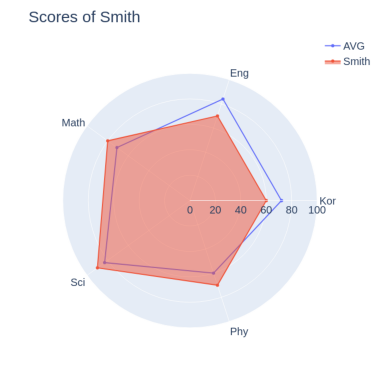

In [ ]:
fills = [None, 'toself']
radar(df=df.iloc[[0, 3], :],
      fills=fills,
      min_max=[0, 100],
      title='Scores of Smith'
      )

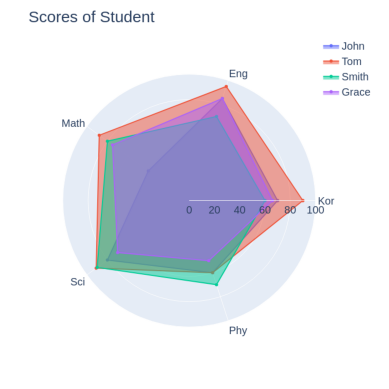

In [ ]:
fills = ['toself', 'toself', 'toself', 'toself']
radar(df=df.iloc[1:, :],
      fills=fills,
      min_max=[0, 100],
      title='Scores of Student'
      )

# <GNI2014 데이터셋>

2014년 세계 각국의 인구와 국민총소득（GNI）정보

## 트리맵

In [ ]:
import plotly.express as px
import webbrowser
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('/GNI2014.csv')
df.head()

,iso3,country,continent,population,GNI
0,BMU,Bermuda,North America,67837,106140
1,NOR,Norway,Europe,4676305,103630
2,QAT,Qatar,Asia,833285,92200
3,CHE,Switzerland,Europe,7604467,88120
4,MAC,"Macao SAR, China",Asia,559846,76270


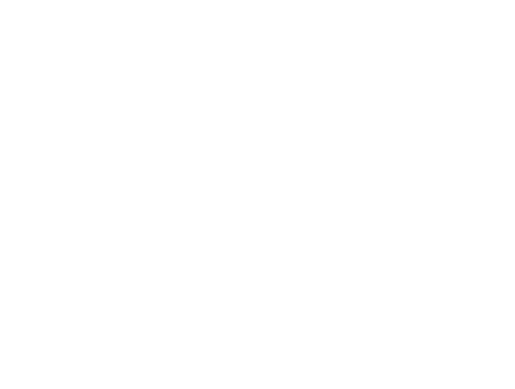

In [ ]:
fig = px.treemap(data_frame=df,
                 path=['continent', 'iso3'],  # 데이터의 계층 구조
                 values='population',  # 타일 면적 기준 컬럼
                 color='GNI',  # 색 온도 기준 컬럼
                 color_continuous_scale='Bluyl'  # 컬러 팔레트
                 )

plt.axis('off')  # 축 눈금 제거
fig.update_layout(margin_t=50, margin_l=25,  # 여백 설정
                  margin_r=25, margin_b=25,
                  width=800,  # 그래프의 폭(pixel)
                  height=600,  # 그래프의 높이(pixel)
                  title_text='GNI 2014',  # 그래프 제목
                  title_font_size=20  # 제목 폰트 크기
                  )

# <지도 활용 데이터 분석>

In [ ]:
#folium: 파이썬에서 지도 시각화에 가장 널리 사용되는 라이브러리
!pip install folium
#오픈소스 방식의 무료 지도 서비스인 OpenStreetMap을 기반으로 작동
#지도 위에 데이터를 인터랙티브하게 표현할 수 있으며, 마커를 추가하거나 원으로 범위를 나타낼 수도 있다.
#서비스가 안정적이고 시각화 결과를 html 파일로 저장할 수 있음

#카카오에서 제공하는 주소를 사용하여 위도와 경도로 변환해 주는 파이썬 패키지
!pip install geokakao
#카카오의 오픈 API를 기반으로 작동
#하루 접속 건수가 제한되어 있어 사용량 초과 시 기능이 동작하지 않을 수 있음

In [ ]:
import folium
import geokakao as gk

# 주소를 위도, 경도로 변환
loc = gk.convert_address_to_coordinates('경기 용인시 수지구 죽전로 152')
print(loc)  # 위도, 경도 출력

# 지도 생성: 위도, 경도로 지도 중심 설정
map = folium.Map(location=loc, zoom_start=16)

# 지도에 마커 추가
folium.Marker(
    location=loc,
    popup="용인시 수지구 죽전로 152"
).add_to(map)

# 지도 화면에 표시
map

('37.3211938747541', '127.132535935195')


In [ ]:
import folium
import geokakao as gk

# 서울 종로구 사직로 161 주소를 위도, 경도로 변환
loc = gk.convert_address_to_coordinates('서울 종로구 사직로 161')
print(loc)  # 출력: [위도, 경도]

# 지도 객체 생성 (zoom_start는 지도 초기 확대 수준)
map = folium.Map(location=loc, zoom_start=16)

# 마커 추가
folium.Marker(location=loc, popup='경복궁').add_to(map)

# 지도 출력 (코랩에서 바로 확인)
map

('37.5759040910202', '126.976842133821')


In [ ]:
import folium
import geokakao as gk

# 강원특별자치도 강릉시 창해로 514 주소를 위도, 경도로 변환
loc = gk.convert_address_to_coordinates('강원특별자치도 강릉시 창해로 514')
print(loc)  # 출력: [위도, 경도]

# 지도 객체 생성 (zoom_start는 지도 초기 확대 수준)
map = folium.Map(location=loc, zoom_start=13)

# 빨간색 별 아이콘으로 마커 추가
folium.Marker(location=loc,
              icon=folium.Icon(color='red', icon='star')).add_to(map)

# 지도 출력 (코랩에서 바로 확인)
map

('37.8057701120176', '128.907481194757')


In [ ]:
import folium
import geokakao as gk

# 강원특별자치도 강릉시 창해로 514 주소를 위도, 경도로 변환
loc = gk.convert_address_to_coordinates('강원특별자치도 강릉시 창해로 514')
print(loc)  # 출력: [위도, 경도]

# 지도 객체 생성 (zoom_start는 지도 초기 확대 수준)
map = folium.Map(location=loc, zoom_start=13)

# 빨간색 별 아이콘으로 마커 추가
folium.Marker(location=loc,
              icon=folium.Icon(color='red', icon='star')).add_to(map)

# 마커 위치에 텍스트 추가
html_start = html = '<div \
style="\
font-size: 12px;\
color: blue;\
background-color:rgba(255, 255, 255, 0.2);\
width:85px;\
text-align:left;\
margin:0px;\
"><b>'
html_end = '</b></div>'

folium.Marker(location=loc,
              icon=folium.DivIcon(
                  icon_anchor=(0, 0),  # 텍스트 위치 설정
                  html=html_start+'경포해수욕장'+html_end
              )).add_to(map)

# 지도 출력 (코랩에서 바로 확인)
map

('37.8057701120176', '128.907481194757')


In [ ]:
import folium
import geokakao as gk
import pandas as pd

# 관광지 정보를 데이터프레임으로 저장
names = ['용두암', '성산일출봉', '정방폭포',
         '중문관광단지', '한라산1100고지', '차귀도']
addr = ['제주시 용두암길 15',
        '서귀포시 성산읍 성산리',
        '서귀포시 동홍동 299-3',
        '서귀포시 중문동 2624-1',
        '서귀포시 색달동 산1-2',
        '제주시 한경면 고산리 산 117']

dict = {"names": names, "addr": addr}
df = pd.DataFrame(dict)
df

# 관광지의 좌표를 df에 추가
gk.add_coordinates_to_dataframe(df, 'addr')
df
df.dtypes

# 문자열 좌푯값을 숫자로 변환
df.decimalLatitude = pd.to_numeric(df.decimalLatitude)
df.decimalLongitude = pd.to_numeric(df.decimalLongitude)
df.dtypes

# 지도의 중심점 계산
center = [df.decimalLatitude.mean(), df.decimalLongitude.mean()]
center

# 지도 객체 생성
map = folium.Map(location=center, zoom_start=10)

# 지도에 마커 추가
for i in range(len(df)):
    folium.Marker(location=[df.iloc[i, 2], df.iloc[i, 3]],
                  icon=folium.Icon(color='red', icon='star')).add_to(map)

# 지도에 텍스트(관광지명) 추가
html_start = html = '<div \
style="\
font-size: 12px;\
color: blue;\
background-color:rgba(255, 255, 255, 0.2);\
width:85px;\
text-align:left;\
margin:0px;\
"><b>'
html_end = '</b></div>'

for i in range(len(df)):
    folium.Marker(location=[df.iloc[i, 2], df.iloc[i, 3]],
              icon=folium.DivIcon(
                  icon_anchor=(0, 0),  # 텍스트 위치 설정
                  html=html_start+df.names[i]+html_end
                  )).add_to(map)

# 구글 코랩에서 지도 바로 출력
map

In [ ]:
import folium
import pandas as pd

# 데이터 로드
df = pd.read_csv('/wind.csv')
df.head()

# 데이터 샘플링
df = df.sample(50, random_state=123)

# 지도의 중심점 구하기
center = [df.lat.mean(), df.lon.mean()]

# 지도 객체 생성
map = folium.Map(location=center, zoom_start=5)

# 측정 위치에 마커 표시하기
for i in range(len(df)):
    folium.Marker(location=[df.lat.iloc[i], df.lon.iloc[i]],
                  icon=folium.Icon(color='blue', icon='flag')).add_to(map)

# 풍속을 원의 크기로 표시하기
map = folium.Map(location=center, zoom_start=5)  # 마커 없는 지도

for i in range(len(df)):
    folium.CircleMarker(location=[df.lat.iloc[i], df.lon.iloc[i]],
                        radius=(df.spd.iloc[i]**0.5)*2,  # 원의 반지름
                        color='red',  # 원의 색
                        stroke=False,  # 윤곽선 없음
                        fill=True,  # 원의 내부 색
                        fill_opacity=0.5  # 원의 내부 색 투명도
                        ).add_to(map)

# 구글 코랩에서 바로 지도 표시
map

In [ ]:
import folium
import geokakao as gk
import pandas as pd

# 데이터 로드
df_subway = pd.read_csv('/subway_line_1_8_20231231.csv')
df_addr = pd.read_csv('/seoul_subway_address_2023.csv')

# 필요한 시간대 및 2호선 데이터 추출
time_zone = ['t07_08시간대', 't08_09시간대']
df_subway = df_subway.loc[df_subway.호선명 == 2]  # 2호선 추출
df_subway = df_subway.groupby('역명')[time_zone].sum()  # 역별 승객 수 집계
df_subway['탑승객 수'] = df_subway.sum(axis=1)  # 탑승객 수 합계

# 지하철 역과 주소 데이터 병합
df_merge = pd.merge(df_subway, df_addr, on='역명', how='inner')

# 좌표 추가
gk.add_coordinates_to_dataframe(df_merge, '도로명주소')

# 좌표값 숫자로 변환
df_merge.decimalLatitude = pd.to_numeric(df_merge.decimalLatitude)
df_merge.decimalLongitude = pd.to_numeric(df_merge.decimalLongitude)

# 지도 중심점 계산
center = df_merge[['decimalLatitude', 'decimalLongitude']].mean().to_list()

# 지도 객체 생성
map = folium.Map(location=center, zoom_start=12)

# 마커 추가
for i in range(len(df_merge)):
    folium.Marker(location=[df_merge.loc[i, 'decimalLatitude'],
                            df_merge.loc[i, 'decimalLongitude']],
                  icon=folium.Icon(color='red', icon='star')).add_to(map)

# 원 추가 (탑승객 수에 비례한 크기)
for i in range(len(df_merge)):
    folium.CircleMarker(location=[df_merge.loc[i, 'decimalLatitude'],
                                  df_merge.loc[i, 'decimalLongitude']],
                        radius=((df_merge.loc[i, '탑승객 수'] / 150000)),  # 원의 반지름
                        color='red',  # 원의 색
                        stroke=False,  # 윤곽선 없음
                        fill=True,  # 원의 내부 색
                        fill_opacity=0.5  # 원의 내부 색 투명도
                        ).add_to(map)

# 역명 텍스트 추가
html_start = html = '<div style="font-size: 12px; color: blue; background-color:rgba(255, 255, 255, 0.2); width:85px; text-align:left; margin:0px;"><b>'
html_end = '</b></div>'

for i in range(len(df_merge)):
    folium.Marker(location=[df_merge.loc[i, 'decimalLatitude'],
                            df_merge.loc[i, 'decimalLongitude']],
                  icon=folium.DivIcon(
                      icon_anchor=(0, 0),  # 텍스트 위치 설정
                      html=html_start + df_merge.loc[i, '역명'] + html_end
                  )).add_to(map)

# 구글 코랩에서 지도 바로 표시
map